In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [2]:
iris_df = pd.read_csv('./Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.shape

(150, 6)

In [4]:
X = iris_df.drop(['Id', 'Species'], axis=1)
y = iris_df['Species']

In [5]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

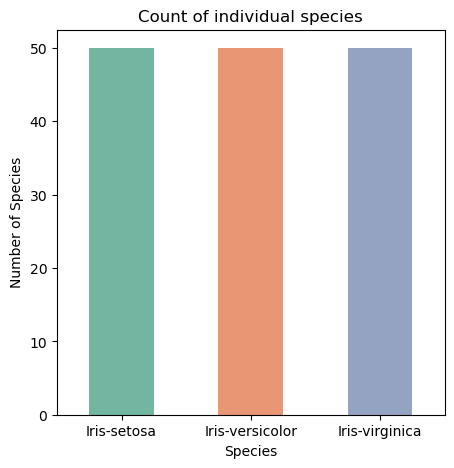

In [6]:
plt.figure(figsize=[5,5])
sns.countplot(data =iris_df, x = 'Species', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.title('Count of individual species')
plt.show()

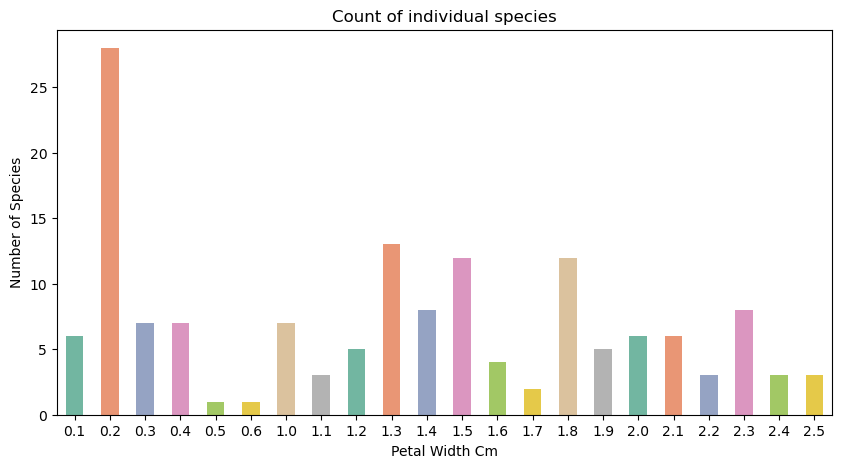

In [7]:
plt.figure(figsize=[10,5])
sns.countplot(data =iris_df, x = 'PetalWidthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Petal Width Cm')
plt.title('Count of individual species')
plt.show()

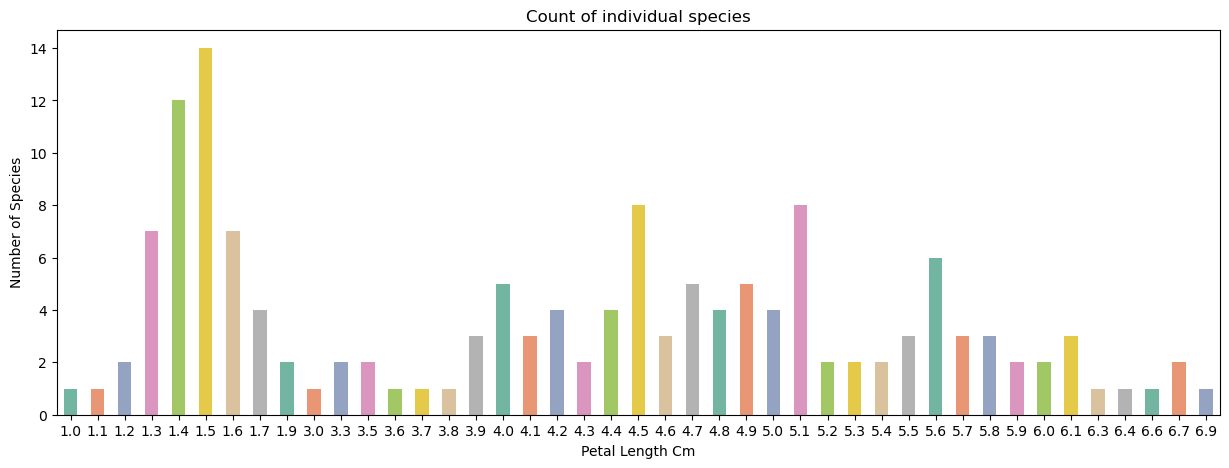

In [8]:
plt.figure(figsize=[15,5])
sns.countplot(data =iris_df, x = 'PetalLengthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Petal Length Cm')
plt.title('Count of individual species')
plt.show()

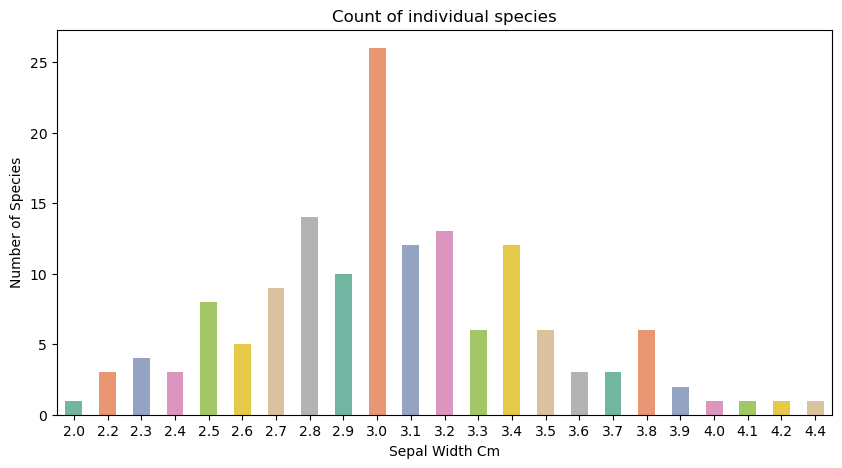

In [9]:
plt.figure(figsize=[10,5])
sns.countplot(data =iris_df, x = 'SepalWidthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Sepal Width Cm')
plt.title('Count of individual species')
plt.show()

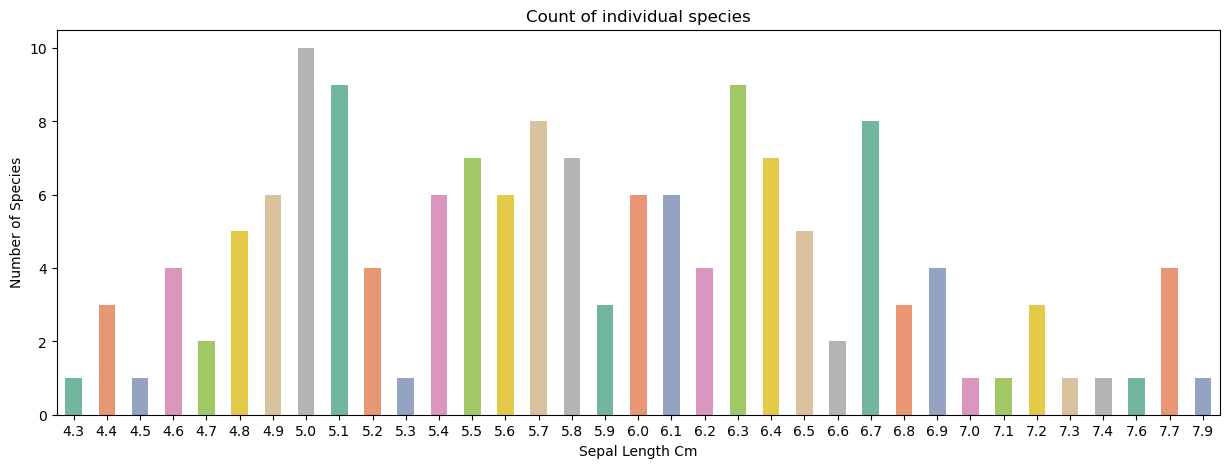

In [10]:
plt.figure(figsize=[15,5])
sns.countplot(data =iris_df, x = 'SepalLengthCm', palette=('Set2'), width=0.5)
plt.ylabel('Number of Species')
plt.xlabel('Sepal Length Cm')
plt.title('Count of individual species')
plt.show()